In [222]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sb
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread


# Problem statement
  Casava has few types of diseases. The goal is to identify the __type__ of disease based on casava leaf image. 

  
    

## Data  
- __label_num_to_disease_mapping__: Contains the label name for the disease.
- __train.csv__ : This contains image file name and correspoinding label id.
- __train_images__ : folder contains train images
- __test_images__ : folder contains test images

In [27]:
# Set up directory paths
base_path='data'
train_ds_path='data/train'
test_ds_path='data/test'
train_label = os.path.join(base_path, 'train.csv')
train_images_path=os.path.join(train_ds_path,'/images/')

In [3]:
# Show details of label - Types of diseases
pd.read_json('label_num_to_disease_map.json',
             orient='index', typ='frame')

,0
0,Cassava Bacterial Blight (CBB)
1,Cassava Brown Streak Disease (CBSD)
2,Cassava Green Mottle (CGM)
3,Cassava Mosaic Disease (CMD)
4,Healthy


In [22]:
# Load the train_ds csv file
train_ds = pd.read_csv(filepath_or_buffer=train_label)
train_ds.head()

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3


In [5]:
# Check unique labels and ensure that they map to json files - 0-4
print(train_ds.nunique(axis=0))

image_id    21397
label           5
dtype: int64


The above confirms that there are 21398 (starts with 0) images with 5 labels.
Let's see how what are most prevelant disease types

In [6]:
count_by_label=train_ds.groupby("label")['label'].count()
print('Count By Label \n',count_by_label)

Count By Label 
 label
0     1087
1     2189
2     2386
3    13158
4     2577
Name: label, dtype: int64


In [7]:
np.sort(pd.unique(train_ds["label"]))

array([0, 1, 2, 3, 4])

In [8]:
labels = {"Id": np.sort(pd.unique(train_ds["label"])),
          "count": np.array(count_by_label)}

percenatge_by_label = pd.DataFrame(data=labels)
percenatge_by_label['%age']=\
    percenatge_by_label['count']*100/percenatge_by_label['count'].sum()
percenatge_by_label=percenatge_by_label.drop(columns=['count'])
#percenatge_by_label.drop(labels=['count'])
percenatge_by_label

,Id,%age
0,0,5.080151
1,1,10.230406
2,2,11.151096
3,3,61.494602
4,4,12.043744


This shows that labels are not equally distributed and that disease type - __Cassava Mosaic Disease (CMD)__ seems to be more common in traning set. 

Let's check as bar graph- count, pie as % distribution and bar as % distribution



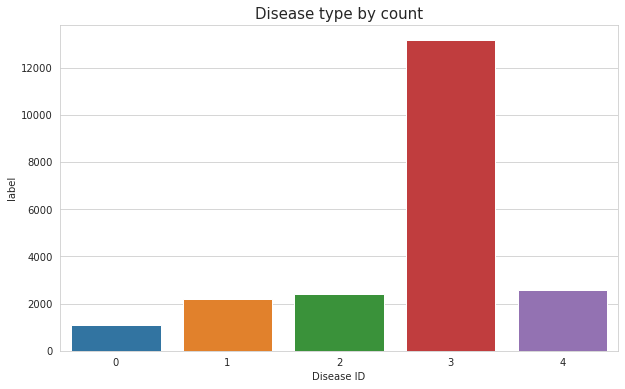

In [9]:
sb.set_style("whitegrid")
fig,ax = plt.subplots(figsize=(10,6))
ax.set_title("Disease type by count", fontsize=15)
ax.set_xlabel("Disease ID")
ax.set_ylabel("Count")

sb.barplot(x=np.sort(pd.unique(train_ds["label"])),
           y=count_by_label, dodge=False )

plt.show()

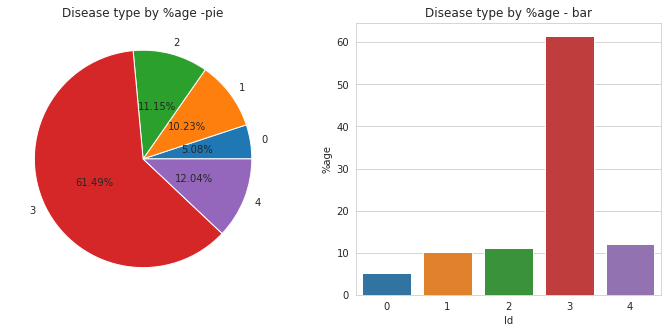

In [10]:
percenatge_by_label=percenatge_by_label.astype({"Id":str})
percenatge_by_label.dtypes
fig,(ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

ax1.set_title('Disease type by %age -pie')
ax1.pie(x=percenatge_by_label['%age'],
         data=percenatge_by_label,
        autopct="%.2f%%", 
        #explode=[0.05]*4, 
        labels=percenatge_by_label['Id'],
        pctdistance=0.5)
plt.subplot(1,2,2)
plt.title('Disease type by %age - bar')
sb.barplot(x=percenatge_by_label['Id'], 
y=percenatge_by_label['%age'])

plt.show()

#### Let's look at 3 image of each type



In [223]:

def get_top_image_labelId(label_id, num_of_images):
    files = train_ds['path'].where(train_ds['label'] == label_id).dropna().head(num_of_images)
    files_as_list = np.array(files)
    return files_as_list

def display_image(label_id, num_of_images, nrows, ncols):
    file_list = get_top_image_labelId(label_id,num_of_images)
    title = "Images for Label Id ", str(label_id)

    plt.subplots(figsize=(5,5))
    for i in range(nrows * ncols):
        plt.subplot(nrows,ncols,i+1)# the number of images in the grid is 5*5 (25)

        plt.axis('off')
        plt.suptitle(title)
        img = imread(file_list[i])
        plt.imshow(img)
    plt.show()
    

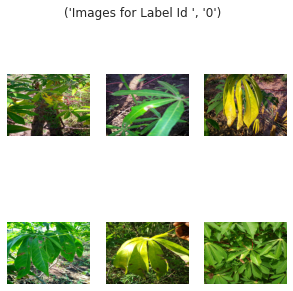

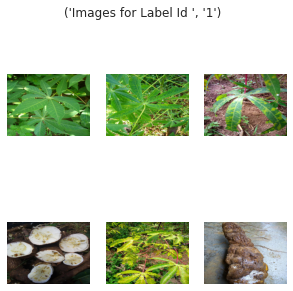

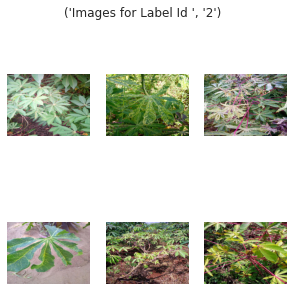

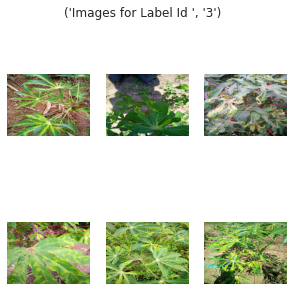

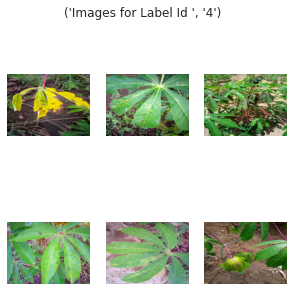

In [224]:
for i in range(5):
    display_image(i,6,2,3)

In [81]:
#train_ds['path'] = train_images_path + train_ds['image_id']
#train_ds.head()

